<a href="https://colab.research.google.com/github/mirandahectora/cpsc-452/blob/main/CPSC%20452/Homework%201/mirandaplazah_homework1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**CPSC 452 - PSET 1**

In [1]:
import numpy as np
import matplotlib.pyplot as plt

***Problem 1***
What are the characteristics of a macine learning algorithm and what is meant by "learning" from data?

Machine learning algorithms are characterized by their data-dependent and data-intense training process, ability to adapt and tune model specifics based on data inputs, and ability to generalize across data sets. "Learning" itself refers to the the process of model reiteration, through which the model gets calibrated to reflect the optimal output.

***Problem 2***

1. Write code in Python that randomly generates N points sampled uniformly in the interval x ∈ [−1, 3].
Output the function y = x2 − 3x + 1 for each of the points generated and add zero-mean Gaussian
noise with standard deviation σ to y. Make plots of x and y with N ∈ {15, 100} and σ ∈ {0, 0.05, 0.2}
(there should be six plots in total). Save the point sets for following questions.
Hint: You may want to check the NumPy library for generating noise.

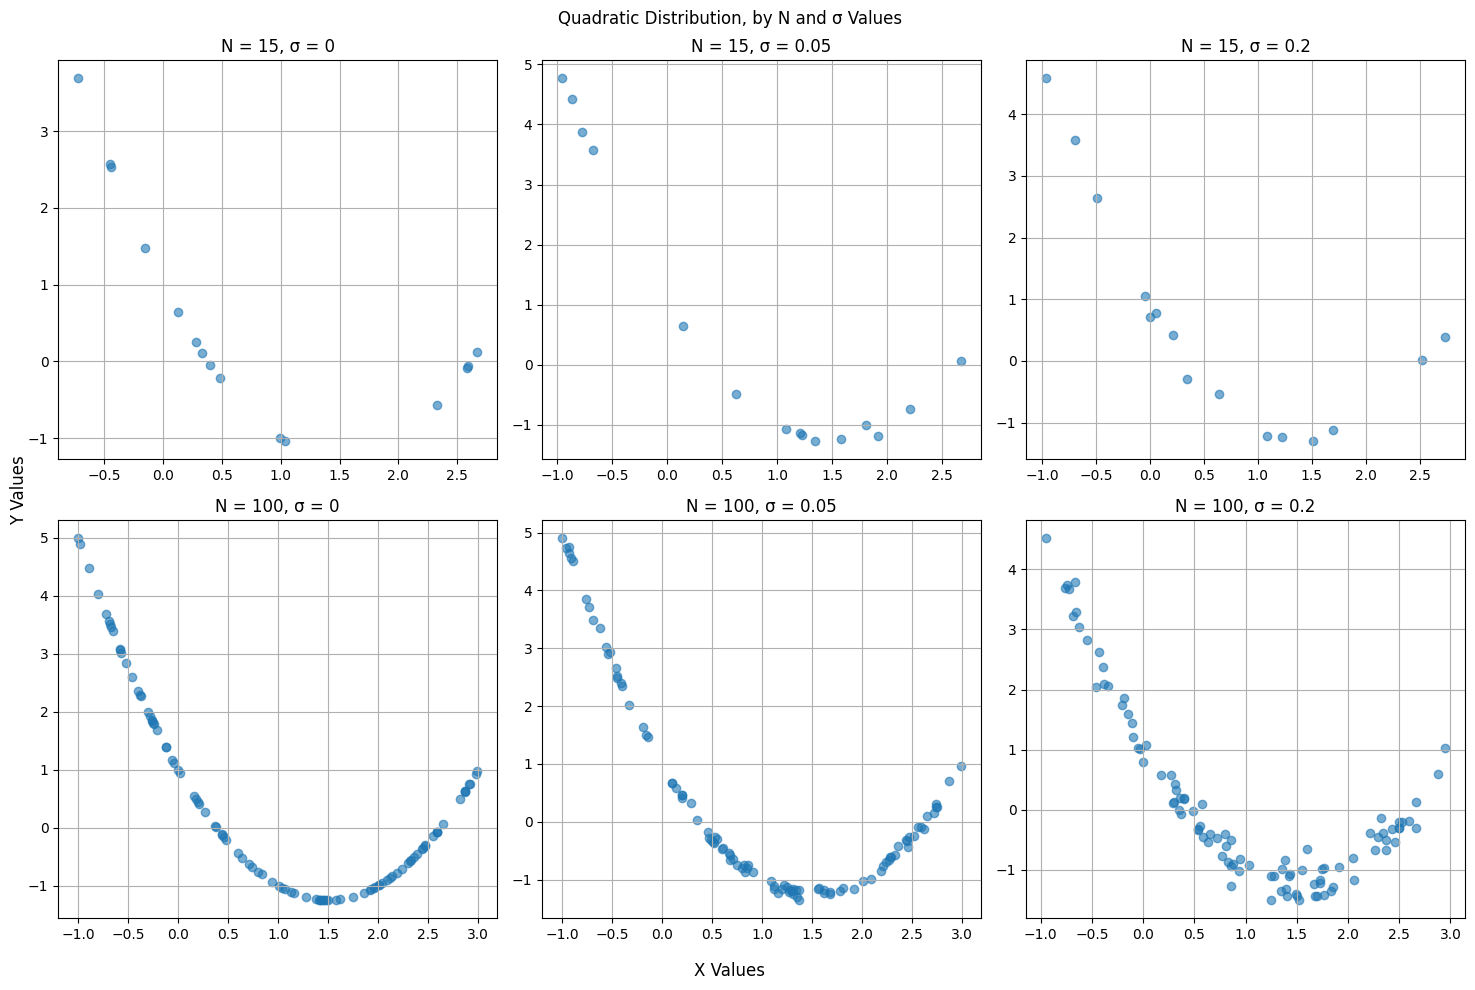

{(15,
  0): (array([ 0.21197787,  2.77734207,  2.19303582,  1.82076223,  2.16599402,
          1.28160504,  2.40779886,  1.09516238,  1.30471251,  1.62531268,
         -0.58199537,  0.2439113 , -0.88531861,  1.60152655,  2.51326065]), array([ 0.40900101,  0.38160276, -0.76970136, -1.14711159, -0.80645196,
         -1.20230364, -0.42590123, -1.0861065 , -1.2118628 , -1.23429673,
          3.08470473,  0.32775883,  4.43974488, -1.23969236, -0.22330285])),
 (15,
  0.05): (array([ 1.38660668,  1.80299945,  1.98056837, -0.38463907,  1.73832018,
          2.15613187,  1.79052338, -0.81472347,  1.81572343,  2.12427401,
         -0.82545241,  1.20032278,  0.03488253,  1.13129575,  0.01371689]), array([-1.20122334, -1.14771688, -0.96372163,  2.24750081, -1.2165145 ,
         -0.83300794, -1.09713985,  4.16874749, -1.07450067, -0.77212059,
          4.17318636, -1.2534337 ,  0.92637038, -1.13663747,  0.95998031])),
 (15,
  0.2): (array([-0.43276204, -0.18182744,  0.63943815,  2.98009915,  1.4073

In [77]:
nvalue = [15, 100]
svalue = [0, 0.05, 0.2]
plots, axes = plt.subplots(2, 3, figsize=(15, 10))
plots.suptitle("Quadratic Distribution, by N and σ Values")
plots.supxlabel("X Values")
plots.supylabel("Y Values")

def noisegen(N, sigma):
        x = np.random.uniform(-1, 3, N)
        y_pre = x**2 - 3*x + 1
        gnoise = np.random.normal(0, sigma, N)

        y = y_pre + gnoise

        return(x, y)


for i, N in enumerate(nvalue):
    for j, σ in enumerate(svalue):
          x, y = noisegen(N, σ)

          axes[i, j].scatter(x, y, alpha = 0.6)
          axes[i, j].set_title(f"N = {N}, σ = {σ}")
          axes[i, j].grid()


plt.tight_layout()
plt.show()

points = {}
for N in nvalue:
    for sigma in svalue:
        x, y = noisegen(N, sigma)
        points[(N, sigma)] = (x, y)

2. Find the optimal weights (in terms of MSE) for ﬁtting a polynomial function to the data in all 6 cases
generated above using a polynomial of degree 1, 2, and 9. Use the least squares analytical solution
given above. Do not use built-in methods for regression. Plot the ﬁtted curves on the same plot as the
data points (you can plot all 3 polynomial curves on the same plot). Report the ﬁtted weights and the
MSE in tables. Qualitatively assess the ﬁt of the curves. Does it look like any of the models overﬁt,
underﬁt, or appropriately ﬁt the data? Explain your reasoning in one or two sentences.

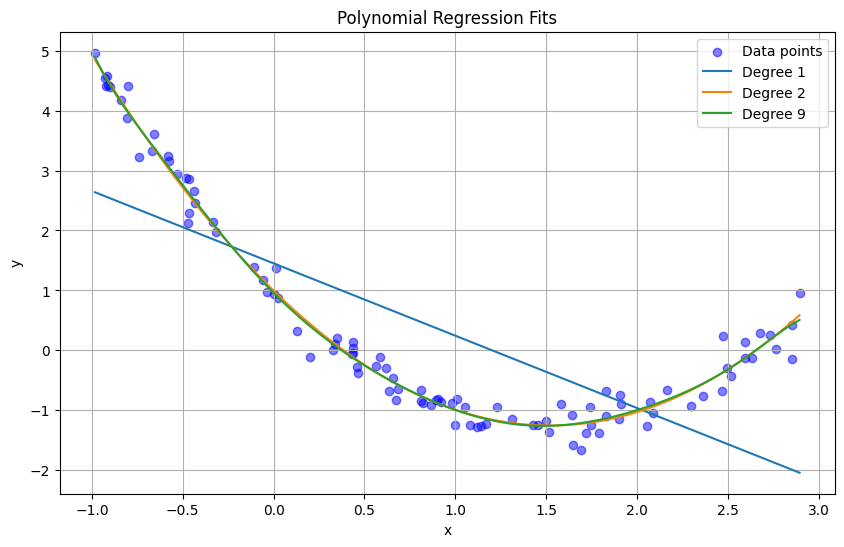


Weights:
Degree 1: [ 1.45121761 -1.20706596]
Degree 2: [ 0.99413292 -2.95974081  0.97385501]
Degree 9: [ 0.95908732 -3.04789385  1.35502333  0.08574641 -0.83655742  0.38977417
  0.39279567 -0.40938598  0.13145426 -0.01453937]

Mean Squared Errors:
Degree 1: 1.445746
Degree 2: 0.049106
Degree 9: 0.048584


In [70]:
degrees = [1, 2, 9]
weights_list = []
mse_list = []

def create_polynomial_features(x, degree):
    X = np.zeros((len(x), degree + 1))
    for d in range(degree + 1):
        X[:, d] = x**d
    return X

def fit_polynomial(x, y, degree):
    X = create_polynomial_features(x, degree)

    weights = np.linalg.inv(X.T @ X) @ X.T @ y
    return weights

def calculate_mse(x, y, weights):
    X = create_polynomial_features(x, len(weights)-1)
    y_pred = X @ weights
    return np.mean((y - y_pred)**2)

def plot_polynomial_fits(x, y, weights_list, degrees):
    plt.figure(figsize=(10, 6))
    plt.scatter(x, y, color='blue', label='Data points', alpha=0.5)

    x_continuous = np.linspace(min(x), max(x), 100)
    for weights, degree in zip(weights_list, degrees):
        X_continuous = create_polynomial_features(x_continuous, degree)
        y_pred = X_continuous @ weights
        plt.plot(x_continuous, y_pred, label=f'  {degree}')

    plt.xlabel('x')
    plt.ylabel('y')
    plt.title('Polynomial Regression Fits')
    plt.legend()
    plt.grid(True)
    plt.show()

weights_list = [fit_polynomial(x, y, degree) for degree in degrees]
mse_list = [calculate_mse(x, y, weights) for weights in weights_list]

plot_polynomial_fits(x, y, weights_list, degrees)

print("Weights:")
for degree, weights in zip(degrees, weights_list):
    print(f"Degree {degree}: {weights}")

print("Mean Squared Errors:")
for degree, mse in zip(degrees, mse_list):
    print(f"Degree {degree}: {mse:.6f}")

3. Apply L2 norm regularization with a 9-degree polynomial model to the cases with σ = 0.05 and
N ∈ {15, 100}. Vary the parameter λ, and choose three values of λ that result in the following
scenarios: underﬁtting, overﬁtting, and an appropriate ﬁt. Report the ﬁtted weights and the MSE in
each of these scenarios.
Hint: The least squares solution can also be used for polynomial regression. Check slides of lecture 2
for details on L2 norm regularization.


Results for N = 15:

Overfitting (λ = 0.001):
Weights: [ 1.03613413 -3.13796283  1.01232609  0.39222199 -0.29236157 -0.30797063
  0.30744781  0.0601269  -0.10925664  0.02381813]
MSE: 0.001270

Appropriate (λ = 0.1):
Weights: [ 1.18111358 -2.54873201  0.25443494 -0.33425674  0.36657423  0.04566724
  0.13856027 -0.14217401  0.01602115  0.00488553]
MSE: 0.009401

Underfitting (λ = 10.0):
Weights: [ 1.1878288  -0.63143    -0.05959513 -0.42655338  0.03038697 -0.27882247
  0.15515326 -0.17325086  0.19075689 -0.05022321]
MSE: 0.728658

Results for N = 100:

Overfitting (λ = 0.001):
Weights: [ 9.84888536e-01 -3.00426599e+00  1.00986407e+00 -1.06009404e-02
  3.41302588e-02 -2.20897142e-02 -2.28692492e-02  3.09240911e-02
 -1.18588767e-02  1.50882014e-03]
MSE: 0.001917

Appropriate (λ = 0.1):
Weights: [ 1.00014762e+00 -2.86574426e+00  8.61098463e-01 -2.54116271e-01
  3.31352061e-01  9.03794315e-03 -1.72440651e-01  9.97008593e-02
 -2.38167155e-02  2.16488576e-03]
MSE: 0.002254

Underfitting (λ = 

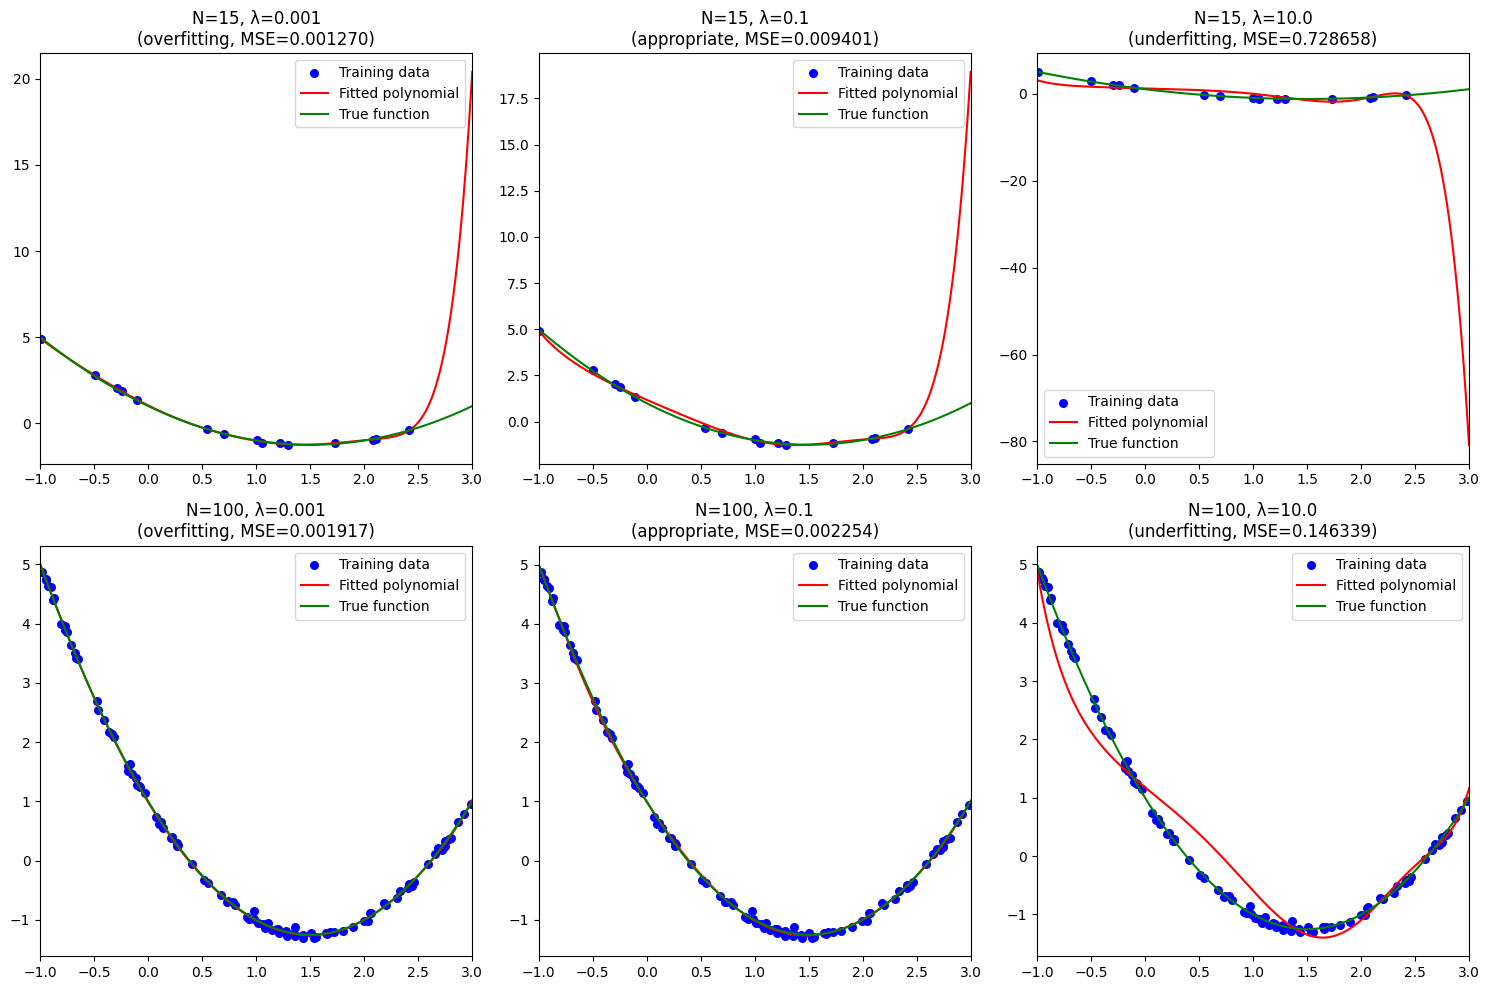

In [81]:
nvalue = [15, 100]
sigma = 0.05
degree = 9

def create_polynomial_features(x, degree):
    X = np.ones((len(x), degree + 1))
    for i in range(1, degree + 1):
        X[:, i] = x ** i
    return X

def true_function(x):
    return x**2 - 3*x + 1

def fit_polynomial_l2(x, y, degree, lambda_):
    X = create_polynomial_features(x, degree)

    n_features = X.shape[1]
    I = np.eye(n_features)
    I[0, 0] = 0

    w = np.linalg.inv(X.T @ X + lambda_ * I) @ X.T @ y
    return w

def calculate_mse(y_true, y_pred):
    return np.mean((y_true - y_pred) ** 2)

lambda_values = {
    'overfitting': 0.001,
    'appropriate': 0.1,
    'underfitting': 10.0
}

plt.figure(figsize=(15, 10))

for i, N in enumerate(nvalue):

    x, y = point_sets[(N, sigma)]
    print(f"\nResults for N = {N}:")

    for j, (scenario, lambda_) in enumerate(lambda_values.items()):
        plt.subplot(2, 3, i*3 + j + 1)

        w = fit_polynomial_l2(x, y, degree, lambda_)

        x_test = np.linspace(-1, 3, 1000)
        X_test = create_polynomial_features(x_test, degree)
        y_pred = X_test @ w

        plt.scatter(x, y, color='blue', label='Training data', s=30)
        plt.plot(x_test, y_pred, color='red', label='Fitted polynomial')
        plt.plot(x_test, true_function(x_test), color='green', label='True function')

        X = create_polynomial_features(x, degree)
        y_pred_train = X @ w
        mse = calculate_mse(y, y_pred_train)

        plt.title(f"N={N}, λ={lambda_}\n({scenario}, MSE={mse:.6f})")
        plt.legend()

        plt.xlim(-1, 3)

        print(f"\n{scenario.capitalize()} (λ = {lambda_}):")
        print(f"Weights: {w}")
        print(f"MSE: {mse:.6f}")

plt.tight_layout()
plt.show()

**Problem 3**

1. Load the dataset from ﬁle prob3 data seed.dat and normalize the features using min-max scaling so
that each feature has the same range of values. (The prob3 data description.txt for the description
of the provided dataset.)

2. Write a program that applies a k-nn classiﬁer to the data with k ∈ {1, 5, 10, 15}. Calculate the test
error using both leave-one-out validation and 5-fold cross validation. Plot the test error as a function
of k. You may use the existing methods in scikit-learn or other libraries for ﬁnding the k-nearest
neighbors, but do not use any built-in k-nn classiﬁers. Any reasonable handling of ties in ﬁnding k-nearest neighbors is okay. Also, do not use any existing libraries or methods for cross validation. Do
any values of k result in underﬁtting or overﬁtting?

3. Apply two other classiﬁers of your choice to the same data. For these additional classiﬁers, you may
use existing libraries, such as scikit-learn classiﬁers, but for cross-validation, you should reuse your
method from 3.2 or modify it slightly. Possible algorithms include (but are not limited to) logistic
regression, QDA, naive Bayes, SVM, and decision trees. Use 5-fold cross validation to calculate the
test error. Report the training and test errors. If any tuning parameters need to be selected, use cross-
validation and report the training and test error for several values of the tuning parameters. Which of
the classiﬁers performed best? Did any of them underﬁt or overﬁt the data? How do they compare to
the k-nn classiﬁers in terms of performance?

**Problem 4**

1. Suppose we take all the weights and biases in a network of perceptrons, and multiply them by a positive
constant, c > 0. Show that the behavior of the network doesn’t change. (Exercise in Ch1 Nielsen book)

2. Given the same setup of problem 4.1 - a network of perceptrons - suppose that the overall input to
the network of perceptrons has been chosen and ﬁxed. Suppose the weights and biases are such that
w·x+b 6 = 0 for the input x to any particular perceptron in the network. Now replace all the perceptrons
in the network by sigmoid neurons, and multiply the weights and biases by a positive constant c > 0.
Show that in the limit as c → ∞ the behavior of this network of sigmoid neurons is exactly the same as
the network of perceptrons. How can this fail when w · x + b = 0 for one of the perceptrons? (Exercise
in Ch1 Nielsen book)

3. For each possible input of the MLP in Figure 1, calculate the output, i.e. what is the output if
X = [0, 0, 0], X = [0, 0, 1], etc. You should have 8 cases total.

4. If we change the perceptrons in Figure 1 to sigmoid neurons, what are the outputs for the same inputs
(e.g., inputs of [0, 0, 0], [0, 0, 1], · · · )?

5. Using perceptrons with appropriate weights and biases, design an adder that does two-bit binary
addition. That is, the adder takes as input two two-bit binary numbers (i.e. 4 binary inputs) and adds
them together. Don’t forget to include the carry bit. The resulting output should be the two-bit sum
and the carry bit for a total of three binary outputs.

**Problem 4** <br> <br>
Time to implement your ﬁrst convolutional neural network (CNN) in PyTorch! For this assignment, we’ll
be training the network on the canonical MNIST dataset. After building the network, we’ll experiment with
an array of hyperparameters, tweaking the network’s width, depth, learning rate and more in pursuit of the
highest classiﬁcation accuracy we can muster.
You may ﬁnd the PyTorch tutorials helpful as you complete this problem: https://pytorch.org/
tutorials/beginner/basics/intro.html. If you haven’t yet, we suggest you go through them. Pay more
attention to the tutorial on the optimization loop, which you will need to build more or less from scratch.
We have provided a colab notebook prob5 cnn.ipynb (https://colab.research.google.com/drive/18N2_Sxo1Jeu9WbTA_XtCVUI4mG6INLYn?usp=sharing) to implement a neural network with PyTorch based
on MNIST data. Within the provided ﬁle is a basic scaﬀold of a model training workﬂow. You may use the
existing functions in the script for all parts of this problem.
Let’s ﬁnish the tasks step by step.

1. Follow the TODOs in prob5 cnn.ipynb to get yourself familiar with the basic PyTorch operations.
You have to pass all the assertions provided as the test cases.

2. Follow the TODOs in prob5 cnn.ipynb and step 1, build and train a SimpleCNN on MNIST dataset: <br><br>
• Implement the ﬁrst SimpleCNN with linear layers only. You will use this as a baseline model for
the next step. <br><br>
• Implement the training function for your CNN. The function should take the model, optimizer,
loss function, training data loader, and validation data loader as input. It should return the
training and validation loss and accuracy after each epoch. <br><br>
• Implement the plot metrics function to visualize the training history.<br><br>
• Use the training function above to train your SimpleCNN on the MNIST dataset. Fill in the
missing parameters for training as well. <br> <br>
Report the results that you got for the experiment. Speciﬁcally: <br><br>
• Create a plot of training and test loss vs epoch (2 lines, 1 plot)<br><br>
• Create a plot of training and test accuracy vs epoch (2 lines, 1 plot)

Use the following figure for problem 4.3 and 4.4. <br> <br>
![title](https://github.com/mirandahectora/cpsc-452/blob/main/CPSC%20452/Homework%201/perceptron.png?raw=1)

3. As you can see in the previous step, the training accuracy of the SimpleCNN is poor. We will now improve its performance with nonlinear layers. <br><br>
• Modify the SimpleCNN by adding nn.MaxPool2d, nn.Dropout, and activation functions.<br><br>
• Use the training function and the same hyperparameters above to train your CNN on the MNIST
dataset. <br><br>
Report the performance comparison (i.e. training and testing error) of SimpleCNN and CNN in one
table.

4. Provide a single table of the ﬁnal training and testing errors for all experiments listed below.<br><br>
• Try adjusting the learning rate to improve its accuracy. You might also try increasing the number
of epochs used. Record your results in a table.<br><br>
• Try training your network with diﬀerent non-linearities between the layers (i.e. relu, softplus, elu,
tanh). You should experiment with these and record your test results for each in a table. <br><br>
• Try changing the width of the hidden layer, keeping the activation function that performs best.
Remember to add these results to your table. <br><br>
• Experiment with the optimizer of your network (i.e. SGD, Adam, RMSProp). You should exper-
iment with these and record your test results for each in a table <br><br>
Which learning rate/activation function/optimizer converges fastest? Does the width of the hidden
layer aﬀect the model accuracy? Which model achieves the highest test accuracy? Provide some
rationale as to the observed diﬀerences.

5. Let’s now add regularization to the previous network. We have a set of old and new parameters you
can try to improve the performance of your model: <br><br>
• Optimizer (SGD, Adam, RMSProp, etc): Diﬀerent optimizers may lead to diﬀerent convergence
speeds and performance. <br><br>
• Weight decay (L2 penalty): Weight decay is a regularization technique to prevent overﬁtting. It
is recommended to use a small weight decay value (e.g., 1e-4). <br><br>
• Activation function (ReLU, Leaky ReLU, Tanh, etc): Diﬀerent activation functions may lead to
diﬀerent convergence speeds and performance. <br><br>
• Dropout rate: Dropout is a regularization technique to prevent overﬁtting. It is recommended to
use a small dropout rate (e.g., 0.2). <br><br>
• ... <br><br>
Please implement a grid search algorithm to ﬁnd the best set of hyperparameters and report the best
validation accuracy you can get. You should also include the plot for loss and accuracy comparison.
Remember, any hyperparameter can be tuned!

6. With your best-performing model, plot a confusion matrix showing which digits were misclassiﬁed,
and what they were misclassiﬁed as. What numbers are frequently confused with one another by your
model? (You may use sklearn’s confusion matrix function to generate the matrix.)

7. What was the highest percentage of classiﬁcation accuracy your convolutional neural network achieved?
Brieﬂy describe the architecture and training process that produced it. (If you like, you can take part in
our friendly class competition by posting your results, along with a short description of your methods,
to https://edstem.org/us/courses/53810/discussion/4185060.)